# Abalone Age Prediction Dataset

### Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. 

### Our first step is to check if the data needs cleaning and to get to know the data a bit.
### We also took the first step in preparation: adding the age column. Age is defined as the number of rings + 1.5

     sex  length  diameter  height  whole_weight  shucked_weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      viscera_weight  shell_weight  rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3      

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5


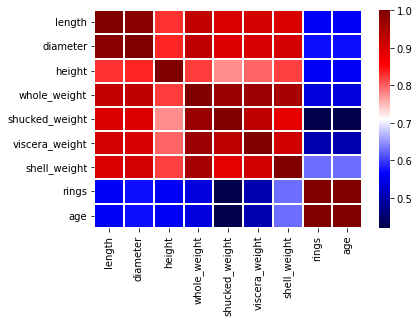

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data",
                names=["sex","length","diameter","height","whole_weight","shucked_weight","viscera_weight",
                       "shell_weight","rings"])
print(df)
# add age column 
df["age"] = df["rings"] + 1.5

print(df.isna().sum())
print(df.describe())
print(df.dtypes)
sns.heatmap(df.corr(),cmap="seismic",linewidths=0.4)
df.head()

### The correlation map shows obvious correlation such as length and diameter, height and weight, but it also shows interesting lack of correlation, e.g. rings age and length don't seem to correlate.

### We will take a closer look at some interesting non-correlations later.

In [3]:
def get_class(x):
    if x=="M" or x=="young":
        return 0;
    if x=="F" or x=="middle age":
        return 1;
    if x=="I" or x=="old":
        return 2;
    
def age_label(x):
    if x<=10:
        return 'young'
    if x<=20:
        return 'middle age'
    return 'old'

# change sex column from pandas object to int
df["sex"] = df["sex"].apply(get_class)

df.drop("rings", axis=1, inplace=True)


df.head()



,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


### DBSCAN with PCA

[[-1.05870397  2.14917362  0.78615226 -0.77129975]
 [-3.1782045   1.51855766 -1.03663173 -0.0354584 ]
 [-0.53624167  0.01285348 -0.06357152  0.22947988]
 ...
 [ 2.22329034  0.24152837 -0.96612128  0.95008391]
 [ 1.55657773 -0.56152749 -0.20515044 -0.20890433]
 [ 5.02977229 -0.29752821 -0.7791241  -0.48642999]]


(-8.0, 8.0)

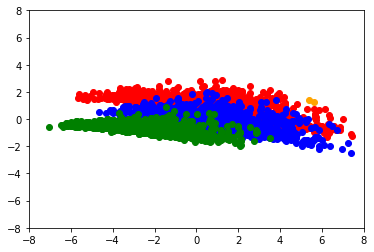

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['sex', 'length', 'diameter','height','whole_weight','shucked_weight','viscera_weight','shell_weight','age']
# Separating out the features
x = df.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=4)
p_ary= pca.fit_transform(x)
print(p_ary)


dbs = DBSCAN(eps=1, min_samples=1)

y_hc = dbs.fit_predict(p_ary)

plt.scatter(p_ary[y_hc ==0,0], p_ary[y_hc == 0,1], c='red')
plt.scatter(p_ary[y_hc==1,0], p_ary[y_hc == 1,1], c='blue')
plt.scatter(p_ary[y_hc==2,0], p_ary[y_hc == 2,1], c='green')
plt.scatter(p_ary[y_hc==3,0], p_ary[y_hc == 3,1], c='orange')
plt.xlim(-8, 8)
plt.ylim(-8, 8)



### Hierarchical Clustering with PCA

(-8.0, 8.0)

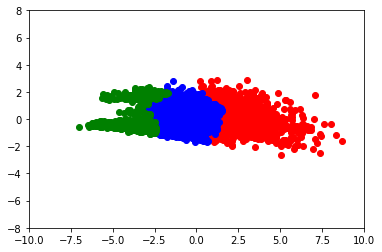

In [5]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')


y_hc = hc.fit_predict(p_ary)

plt.scatter(p_ary[y_hc ==0,0], p_ary[y_hc == 0,1], c='red')
plt.scatter(p_ary[y_hc==1,0], p_ary[y_hc == 1,1], c='blue')
plt.scatter(p_ary[y_hc==2,0], p_ary[y_hc == 2,1], c='green')
plt.scatter(p_ary[y_hc==3,0], p_ary[y_hc == 3,1], c='orange')
plt.xlim(-10, 10)
plt.ylim(-8, 8)

## Data Analysis
### Questions on the dataset:
### 1. Are there age discrepancies between abalones of different sexes?
### 2. What is the composition of the whole weight?
### 3. Are there size and weight discrepancies between abalones of different sexes?
### 4. Do size and weight correlate with age?
### 5. How long is an abalone considered infant?
### 6. How large can infant abalones get?
### 7.  Is there a correlation Diameter and Rings

### 1.)

     sex   age
0      M  16.5
1      M   8.5
2      F  10.5
3      M  11.5
6      F  21.5
...   ..   ...
4172   F  12.5
4173   M  11.5
4174   M  10.5
4175   F  11.5
4176   M  13.5

[2835 rows x 2 columns]


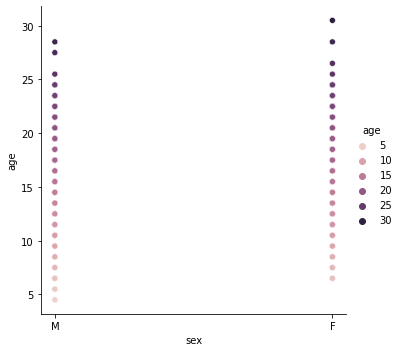

In [6]:
#fig, ax = plt.subplots()

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data",
                names=["sex","length","diameter","height","whole_weight","shucked_weight","viscera_weight",
                       "shell_weight","rings"])

df["age"] = df["rings"] + 1.5

noInfants = df[df["sex"]!='I'][['sex','age']]
print(noInfants)
#ax.set(title="Sex and Age Correlation", xlabel="sex", ylabel="age")
#ax.bar(noInfants["age"],noInfants["sex"], color="blue")

sns.relplot(
    data=noInfants,
    x="sex", y="age", hue="age",
)


### There female abalones over the age of 30 where as males don't reach the age of 30.

### 2.)

sample weights:  [0.0995, 0.0485, 0.07]
added_weights:  0.21800000000000003
whole_weight:  0.2255


([<matplotlib.patches.Wedge at 0x21a75393370>,
 [Text(0.15012466415757128, 1.0897075686676572, 'shucked_weight'),
  Text(-1.0020864032636947, -0.45367702211378536, 'viscera_weight'),
  Text(0.5861938775788498, -0.9307936064934442, 'shell_weight')])

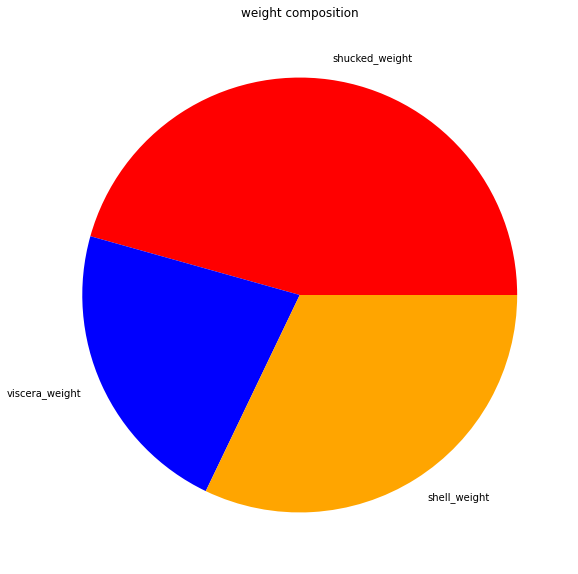

In [7]:
fig, (ax1) = plt.subplots(1, 1, figsize=(15, 10))

colors = ["red", "blue", "orange"]
labels = ["shucked_weight", "viscera_weight", "shell_weight"]
weights = [df["shucked_weight"], df["viscera_weight"], df["shell_weight"]]

max_weight = df["whole_weight"].max()
max_weights = [x.max()/ max_weight for x in weights]
#min_weight = df["whole_weight"].min()
#min_weights = [x.min()/ min_weight for x in weights]
#mean_weight = df["whole_weight"].mean()
#mean_weights = [x.mean()/ mean_weight for x in weights]


sample = df.iloc[1]
sw = sample["shucked_weight"]
vw = sample["viscera_weight"]
shw = sample["shell_weight"]

sample_weights=[sw,vw,shw]
print("sample weights: ", sample_weights)
added_weights = sw + vw + shw

print("added_weights: ", added_weights)
print("whole_weight: ",sample["whole_weight"])

ax1.set(title="weight composition")
ax1.pie(sample_weights,labels=labels, colors=colors)


### Shucked weight takes up over a third of the whole weight of the abalone. The visceral makes up the least of the whole weight.

### 3.)

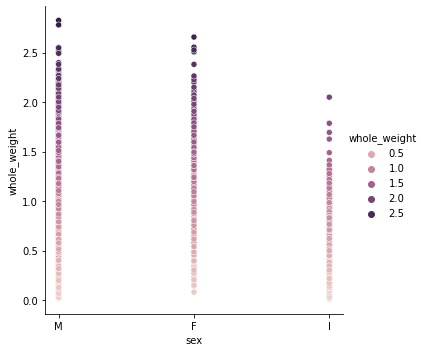

In [8]:
noInfants = df[['sex','whole_weight']]
sns.relplot(
    data=noInfants,
    x="sex", y="whole_weight", hue="whole_weight",
)

### Male abalones can get a bit heavier than female abalones.

### 4.)

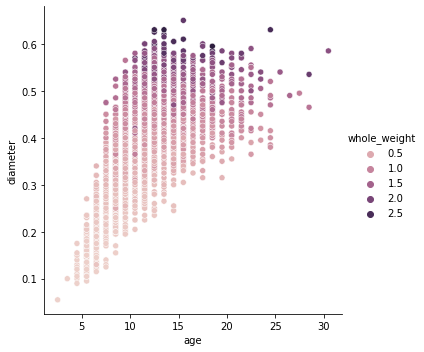

In [9]:
sns.relplot(
    data=df,
    x="age", y="diameter", hue="whole_weight",
)



### There is no strong correlation between size, weight and age. The very young abalones are the smallest and lightest and the oldest abalones are among the largest, but not the heaviest. The heaviest abalones are middle aged (12-20 years). 
### Besides that there are very large weight and size variations in abalones of the same age

### 5.)

In [10]:
infants = df[df["sex"]=='I']["age"]
print("minimum age: ",infants.min())
print("max age: ",infants.max())

minimum age:  2.5
max age:  22.5


### An abalone can be considered an infant until the age of 22,5

### 6.) 

In [11]:
infants = df[df["sex"]=='I']["length"]
print("minimum length: ",infants.min())
print("max length: ",infants.max())

minimum length:  0.075
max length:  0.725


### An infant abalone can be as small as 0.075 (units of measurement unclear!) and as large as 0.725

### 7.)

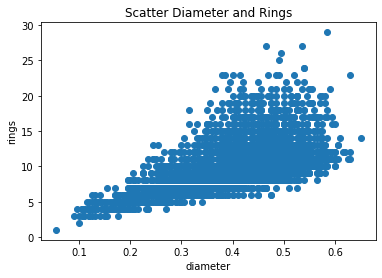

In [12]:
plt.scatter(df["diameter"], df["rings"])
plt.title("Scatter Diameter and Rings")
plt.xlabel("diameter")
plt.ylabel("rings")
plt.show()

### We can see a small correlation as the diameter grows, the number of rings also grows. But there is a lot of variation of rings within the same diameter range, which means that the correlation is not strong.

### Change sex from pandas object to int, drop rings column, replace age with age_label column

In [13]:
def get_class(x):
    if x=="M" or x=="young":
        return 0;
    if x=="F" or x=="middle age":
        return 1;
    if x=="I" or x=="old":
        return 2;
    
def age_label(x):
    if x<=10:
        return 'young'
    if x<=20:
        return 'middle age'
    return 'old'

# change sex column from pandas object to int
df["sex"] = df["sex"].apply(get_class)

df.drop("rings", axis=1, inplace=True)
df["age"] = df["age"].apply(age_label)

df["age_label"] = df["age"].apply(get_class)
df.drop("age", axis=1, inplace=True)


df.head()



,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age_label
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0


## Classification on age

### Preparing data for machine learning algorithms

In [14]:
from sklearn.model_selection import train_test_split # Split into training and test
# test_size: what proportion of original data is used for test set



X = df.drop("age_label", axis=1)
Y = df["age_label"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
pca = PCA(.95)
pca.fit(x_train)
pca.n_components_
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

In [15]:
print(x_train.shape)
print(x_test.shape)


(3341, 3)
(836, 3)


In [16]:
from sklearn.preprocessing import OneHotEncoder
### One hot encoding
Y_train_arr = y_train.array.reshape(-1,1)
Y_test_arr = y_test.array.reshape(-1,1)

onehot_encoder = OneHotEncoder(sparse=False)
onehot_Y_train = onehot_encoder.fit_transform(Y_train_arr)
onehot_Y_test = onehot_encoder.fit_transform(Y_test_arr)

print(onehot_Y_train)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


## Classification with Random Forest Classificator

In [19]:
# import model
from sklearn.ensemble import RandomForestClassifier

# instantiate model
model = RandomForestClassifier(n_jobs=-1) #n_jobs=-1 means that we are using all computer power to fit the model
                           



model.set_params(n_estimators=300)
model.fit(x_train, onehot_Y_train)
y_pred_test = model.predict(x_test)
print("score: ", model.score(x_test, onehot_Y_test))





score:  0.7882775119617225


### Classification using neural network

In [173]:
from keras.models import Sequential
from keras.layers import Dense

print(x_train.shape)
print(onehot_Y_train.shape)


model = Sequential()
model.add(Dense(20, input_dim=3, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, onehot_Y_train, epochs=100, batch_size=100)
accuracy = model.evaluate(x_test, onehot_Y_test, verbose=0)
print(accuracy)

(3341, 3)
(3341, 3)
Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 1.1544 - accuracy: 0.3191
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 0.7352 - accuracy: 0.7611
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 0.5723 - accuracy: 0.7950
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 0.5302 - accuracy: 0.8025
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 0.5155 - accuracy: 0.7980
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 0.5063 - accuracy: 0.8063
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 0.5000 - accuracy: 0.8078
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 0.4955 - accuracy: 0.8060
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 0.4916 - accuracy: 0.8078
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 0.4881 - accura

### Classification using a neural network shows higher accuracy and faster convergence